Project name-Rabies in Asia:A Time-Series and Heatmap Visualization

**Author:** Sourav Adhikary  
**Tools Used:** Python, pandas, matplotlib, seaborn  
**Background:** As a veterinary graduate interested in One Health and public health data, this project visualizes rabies deaths across Asia using simple yet effective Python tools.

In [22]:
import pandas as pd

df = pd.read_csv("data.csv")

# Rename for clarity
df = df.rename(columns={
    "Location": "Country",
    "Indicator": "Indicator",
    "Period": "Year",
    "First Tooltip": "Deaths"
})

df["Deaths"] = pd.to_numeric(df["Deaths"], errors="coerce")

# Pivot to prepare for plotting
pivot_df = df.pivot(index="Year", columns="Country", values="Deaths").sort_index()


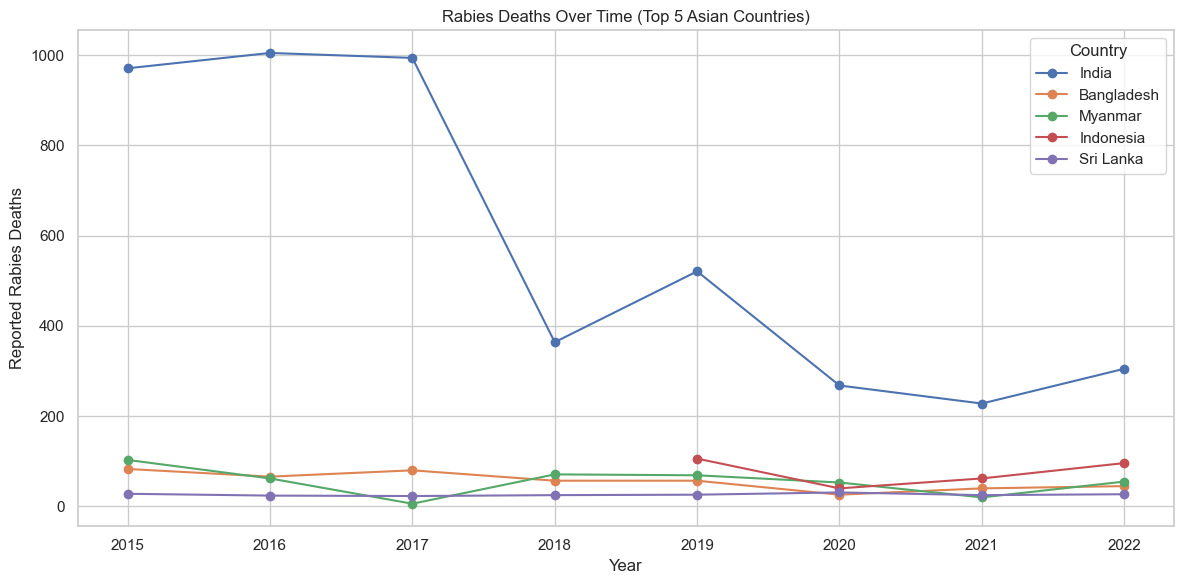

In [23]:
import matplotlib.pyplot as plt

top_countries = pivot_df.sum().sort_values(ascending=False).head(5).index

pivot_df[top_countries].plot(figsize=(12, 6), marker='o')
plt.title("Rabies Deaths Over Time (Top 5 Asian Countries)")
plt.xlabel("Year")
plt.ylabel("Reported Rabies Deaths")
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()


In [5]:
df

,Country,Indicator,Year,Deaths
0,Bangladesh,Reported number of human rabies deaths,2022,45
1,Bangladesh,Reported number of human rabies deaths,2021,40
2,Bangladesh,Reported number of human rabies deaths,2020,26
3,Bangladesh,Reported number of human rabies deaths,2019,57
4,Bangladesh,Reported number of human rabies deaths,2018,57
...,...,...,...,...
83,Timor-Leste,Reported number of human rabies deaths,2019,0
84,Timor-Leste,Reported number of human rabies deaths,2018,0
85,Timor-Leste,Reported number of human rabies deaths,2017,No data
86,Timor-Leste,Reported number of human rabies deaths,2016,No data


C:\Users\Asus\AppData\Local\Temp\ipykernel_13692\2935244898.py:26: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


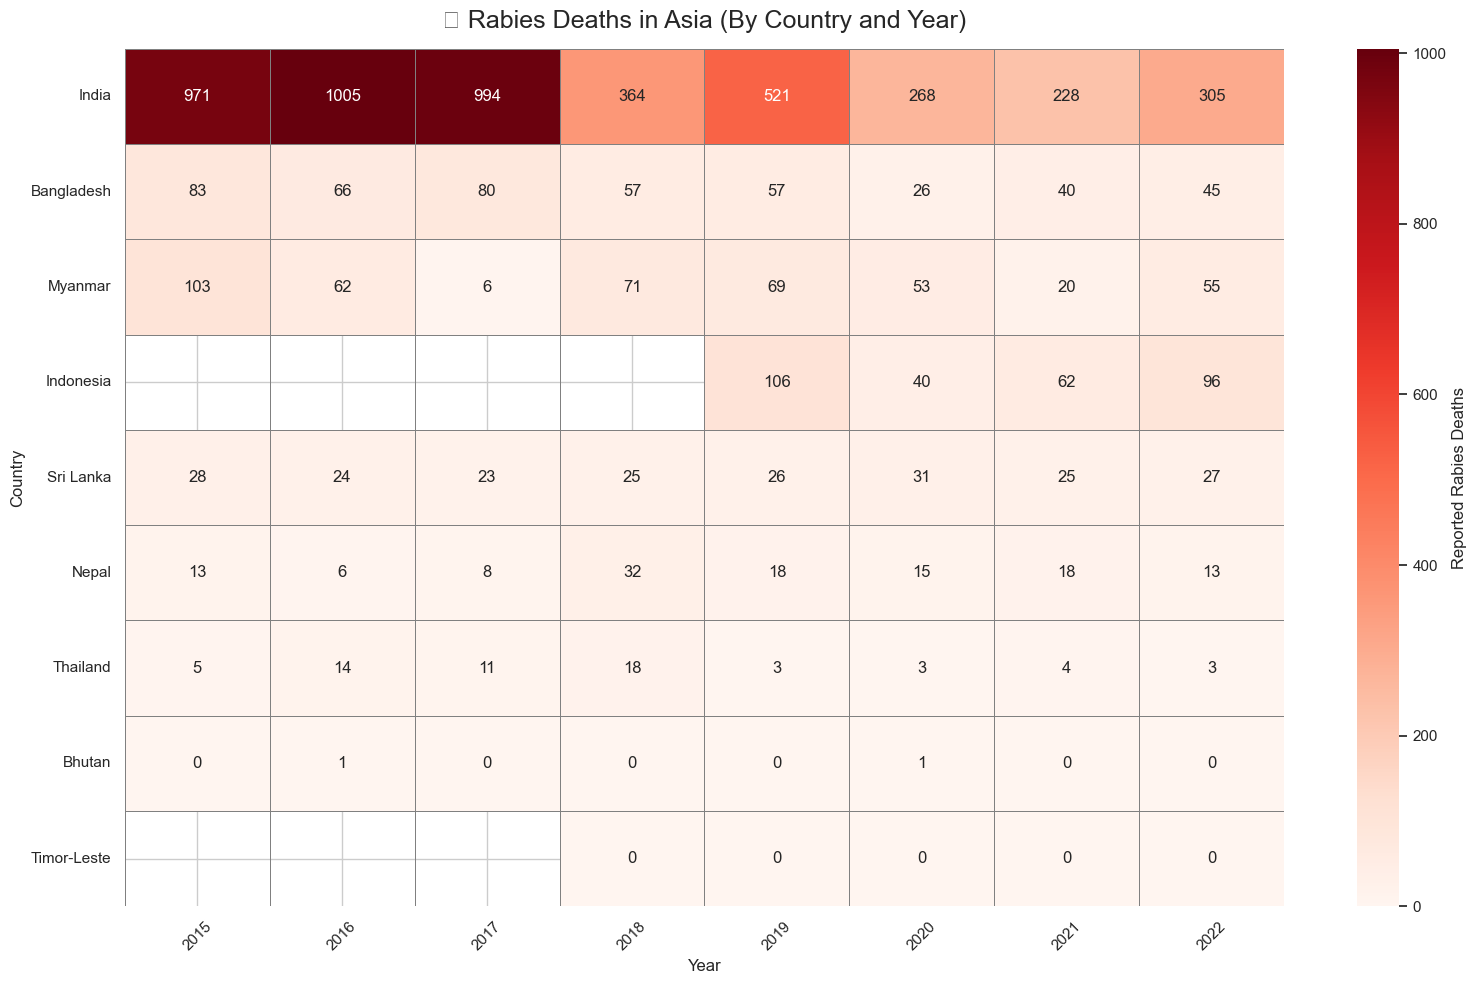

In [24]:
import seaborn as sns

heatmap_df = pivot_df.dropna(axis=1, how='all')
sorted_countries = heatmap_df.sum().sort_values(ascending=False).index
heatmap_df = heatmap_df[sorted_countries]

plt.figure(figsize=(16, 10))
sns.set(font_scale=1.0)
sns.set_style("whitegrid")

sns.heatmap(
    heatmap_df.T,
    cmap="Reds",
    linewidths=0.4,
    linecolor='gray',
    annot=True,
    fmt=".0f",
    cbar_kws={'label': 'Reported Rabies Deaths'}
)

plt.title("🔴 Rabies Deaths in Asia (By Country and Year)", fontsize=18, pad=15)
plt.xlabel("Year")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Country       0
Indicator     0
Year          0
Deaths       23
dtype: int64


In [8]:
pivot_df = df.pivot(index="Year", columns="Country", values="Deaths").sort_index()
pivot_df.head()

Country,Bangladesh,Bhutan,Democratic People's Republic of Korea,India,Indonesia,Maldives,Myanmar,Nepal,Sri Lanka,Thailand,Timor-Leste
Year,,,,,,,,,,,
2015,83.0,0.0,NaN,971.0,NaN,NaN,103.0,13.0,28.0,5.0,NaN
2016,66.0,1.0,NaN,1005.0,NaN,NaN,62.0,6.0,24.0,14.0,NaN
2017,80.0,0.0,NaN,994.0,NaN,NaN,6.0,8.0,23.0,11.0,NaN
2018,57.0,0.0,NaN,364.0,NaN,NaN,71.0,32.0,25.0,18.0,0.0
2019,57.0,0.0,NaN,521.0,106.0,NaN,69.0,18.0,26.0,3.0,0.0


In [11]:
import matplotlib.pyplot as plt

In [ ]:
# Identify top 5 countries by total deaths
top_countries = pivot_df.sum().sort_values(ascending=False).head(5).index

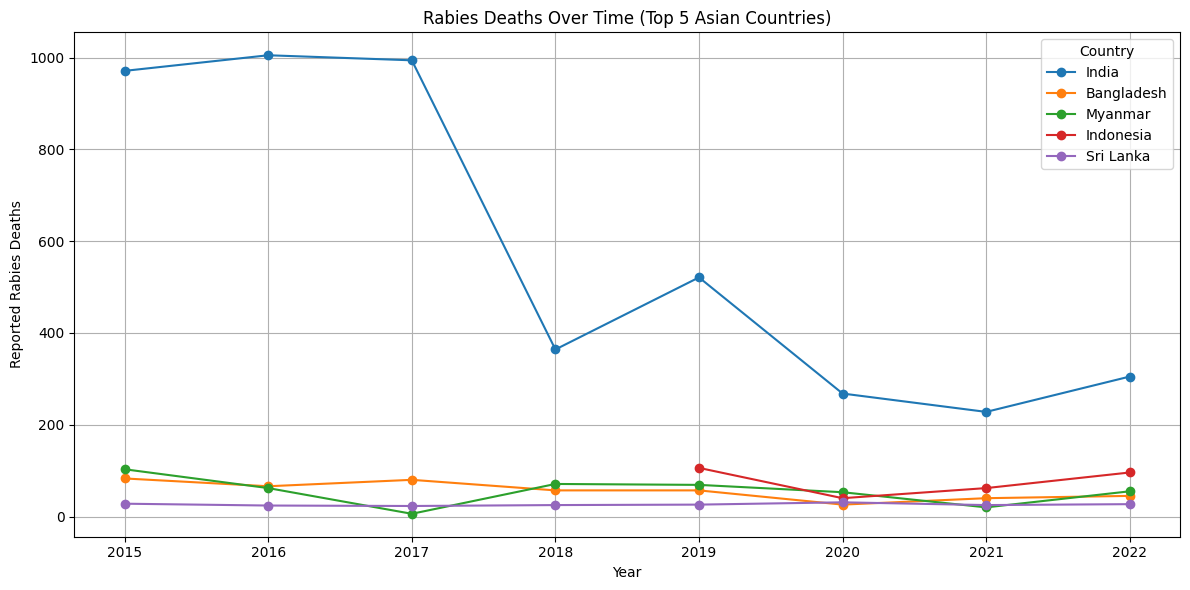

In [15]:
# Plot time-series
pivot_df[top_countries].plot(figsize=(12, 6), marker='o')
plt.title("Rabies Deaths Over Time (Top 5 Asian Countries)")
plt.xlabel("Year")
plt.ylabel("Reported Rabies Deaths")
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

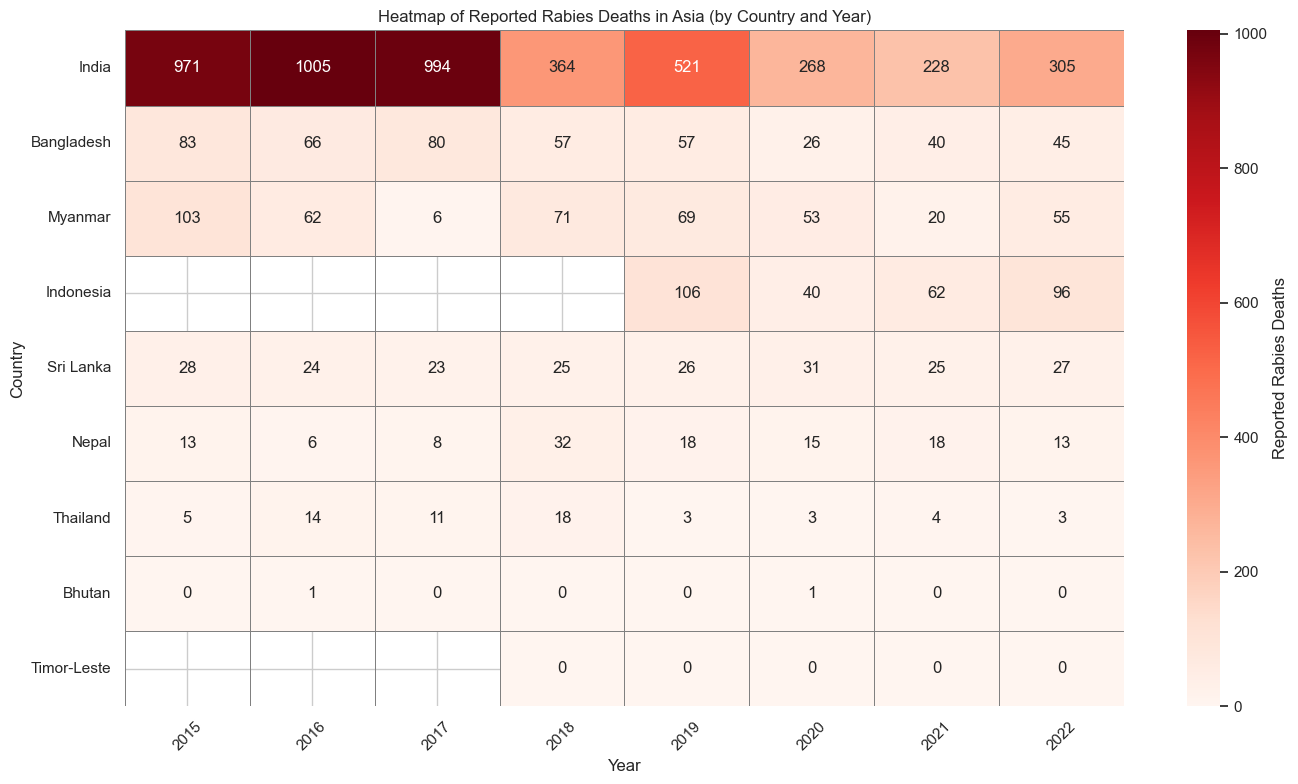

In [21]:
import seaborn as sns

# Optional: remove countries with all missing values
heatmap_df = pivot_df.dropna(axis=1, how='all')

# Sort countries by total deaths (optional but helps visual order)
sorted_countries = heatmap_df.sum().sort_values(ascending=False).index
heatmap_df = heatmap_df[sorted_countries]

# Set plot size and style
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.0)
sns.set_style("whitegrid")

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(    heatmap_df.T,
    cmap="Reds",
    linewidths=0.4,
    linecolor='gray',
    annot=True,
    fmt=".0f",
    cbar_kws={'label': 'Reported Rabies Deaths'})
plt.title("Heatmap of Reported Rabies Deaths in Asia (by Country and Year)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()